In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow import keras 
import os 
import math 
import random 
import pickle 
import glob
import matplotlib.pyplot as plt 
from collections import deque 
from tensorflow.keras import layers
import time 
import scipy.io as sio

from vehicle_model_variant import Environment
# from vehicle_model_ECMS_2 import Environment_ECMS  
from cell_model import CellModel 
from driver_MDP import Driver_MDP 

In [2]:
driving_cycle_path = '../../OC_SIM_DB/OC_SIM_DB_Cycles/Highway/01_FTP72_fuds.mat'
driving_cycle = sio.loadmat(driving_cycle_path)
driving_cycle = driving_cycle["sch_cycle"][:, 1]
battery_path = "../../OC_SIM_DB/OC_SIM_DB_Bat/OC_SIM_DB_Bat_nimh_6_240_panasonic_MY01_Prius.mat"
motor_path = "../../OC_SIM_DB/OC_SIM_DB_Mot/OC_SIM_DB_Mot_pm_95_145_X2.mat"
cell_model = CellModel()
env = Environment(cell_model, driving_cycle, battery_path, motor_path, 10)

js = np.linspace(0.0001, 2.4999, 100)
voltage_thermo = cell_model.get_thermo_voltage()
powers_net = [] 
for j in js: 
    voltage_net = cell_model.get_voltage(j) 
    stack_voltage = env.stack_comp["cell_number"] * voltage_net
    stack_current = env.stack_comp["effective_area_cell"] * j
    power_total = stack_voltage * stack_current 
    power_net = power_total * env.DC_eff - env.power_aux 
    powers_net.append(power_net)

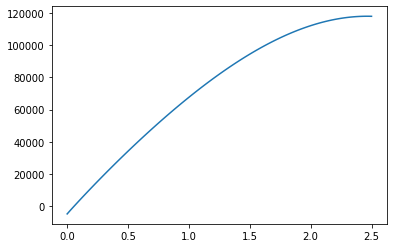

In [3]:
plt.plot(js, powers_net) 

In [4]:
max(powers_net)

117911.36255339574